# Import Library & Packages

In [673]:
#!pip install --upgrade notebook nbconvert

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Data Import

dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [674]:
import pandas as pd
data = pd.read_csv('marketing_campaign.csv', sep='\t')

## Understanding Data

In [675]:
pd.set_option('display.max_columns', None)
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [676]:
data.info() # check for dat ainformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [677]:
data.describe() # numerical data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [678]:
for column in data.select_dtypes(include=['object']).columns:
    print(data[column].value_counts()) # categorical data

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64


### Remove Customer with age over 100
They're unlikely to make purchase

In [679]:
data = data[~data['Year_Birth'].isin([1893, 1899, 1900])]

## Missing Values

In [680]:
missing_values = data.isnull().sum() # Only column income that has 24 missing values
missing_p = round(24/data.shape[0] * 100, 4) # Hard code in 24
print("Missing Values:", missing_values)
print("Missing Value %:", missing_p, "%") # 1.07% of rows have missing values

Missing Values: ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
Missing Value %: 1.0729 %


In [681]:
missing_income_rows = data[data['Income'].isnull()] # Checking the missing row details
missing_income_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [682]:
# Do not want to delete the missing rows, use median income might not be accurate, so using iterative imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

# separate numerical and categorical values
columns_for_imputation = ['Year_Birth', 'Kidhome', 'Teenhome', 'Income']
data_for_imputation = data[columns_for_imputation].copy()

data_categorical = data[['Education', 'Marital_Status']]

encoder = OneHotEncoder(drop='first')
data_encoded = encoder.fit_transform(data_categorical) 

data_encoded = pd.DataFrame(data_encoded.toarray(), 
                            columns=encoder.get_feature_names_out(['Education', 'Marital_Status']))

# combining back the numerical and categorical values
data_for_imputation = data_for_imputation.reset_index(drop=True)
data_encoded = data_encoded.reset_index(drop=True)

data_combined = pd.concat([data_for_imputation, data_encoded], axis=1)

# impute the missing values
imputer = IterativeImputer()
imputed_data = pd.DataFrame(imputer.fit_transform(data_combined), columns=data_combined.columns)

# use a copy for the new data
data2 = data.copy()
data2.reset_index(drop=True, inplace=True)
imputed_data.reset_index(drop=True, inplace=True)
data2.loc[data2['Income'].isnull(), 'Income'] = imputed_data.loc[data2['Income'].isnull(), 'Income']

In [683]:
# Checking whether got rid of missing values
print("Number of missing values for each column:")
print(data2.isnull().sum())

# Checking whether deleted more values than needed
different_rows_data = len(data) - len(pd.merge(data, data2, how='inner'))
different_rows_data2 = len(data2) - len(pd.merge(data, data2, how='inner'))

print("Number of different rows in data compared to data2:", different_rows_data)
print("Number of different rows in data2 compared to data:", different_rows_data2)

Number of missing values for each column:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64
Number of different rows in data compared to data2: 24
Number of different rows in data2 compared to data: 24


In [684]:
# double checking whether other data is not imputed
check_value = data2[data2['ID'].isin([5524, 2174, 4141, 1994, 5255, 7281])] # first 3 IDs from the non-missing value row & rest from missing value row
check_value # value matches, go to next phase

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
10,1994,1983,Graduation,Married,41338.939422,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,40701.506008,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,65039.514634,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0


## Duplication check

In [685]:
data2[data2.duplicated()] # no duplicated values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


## Outliers check

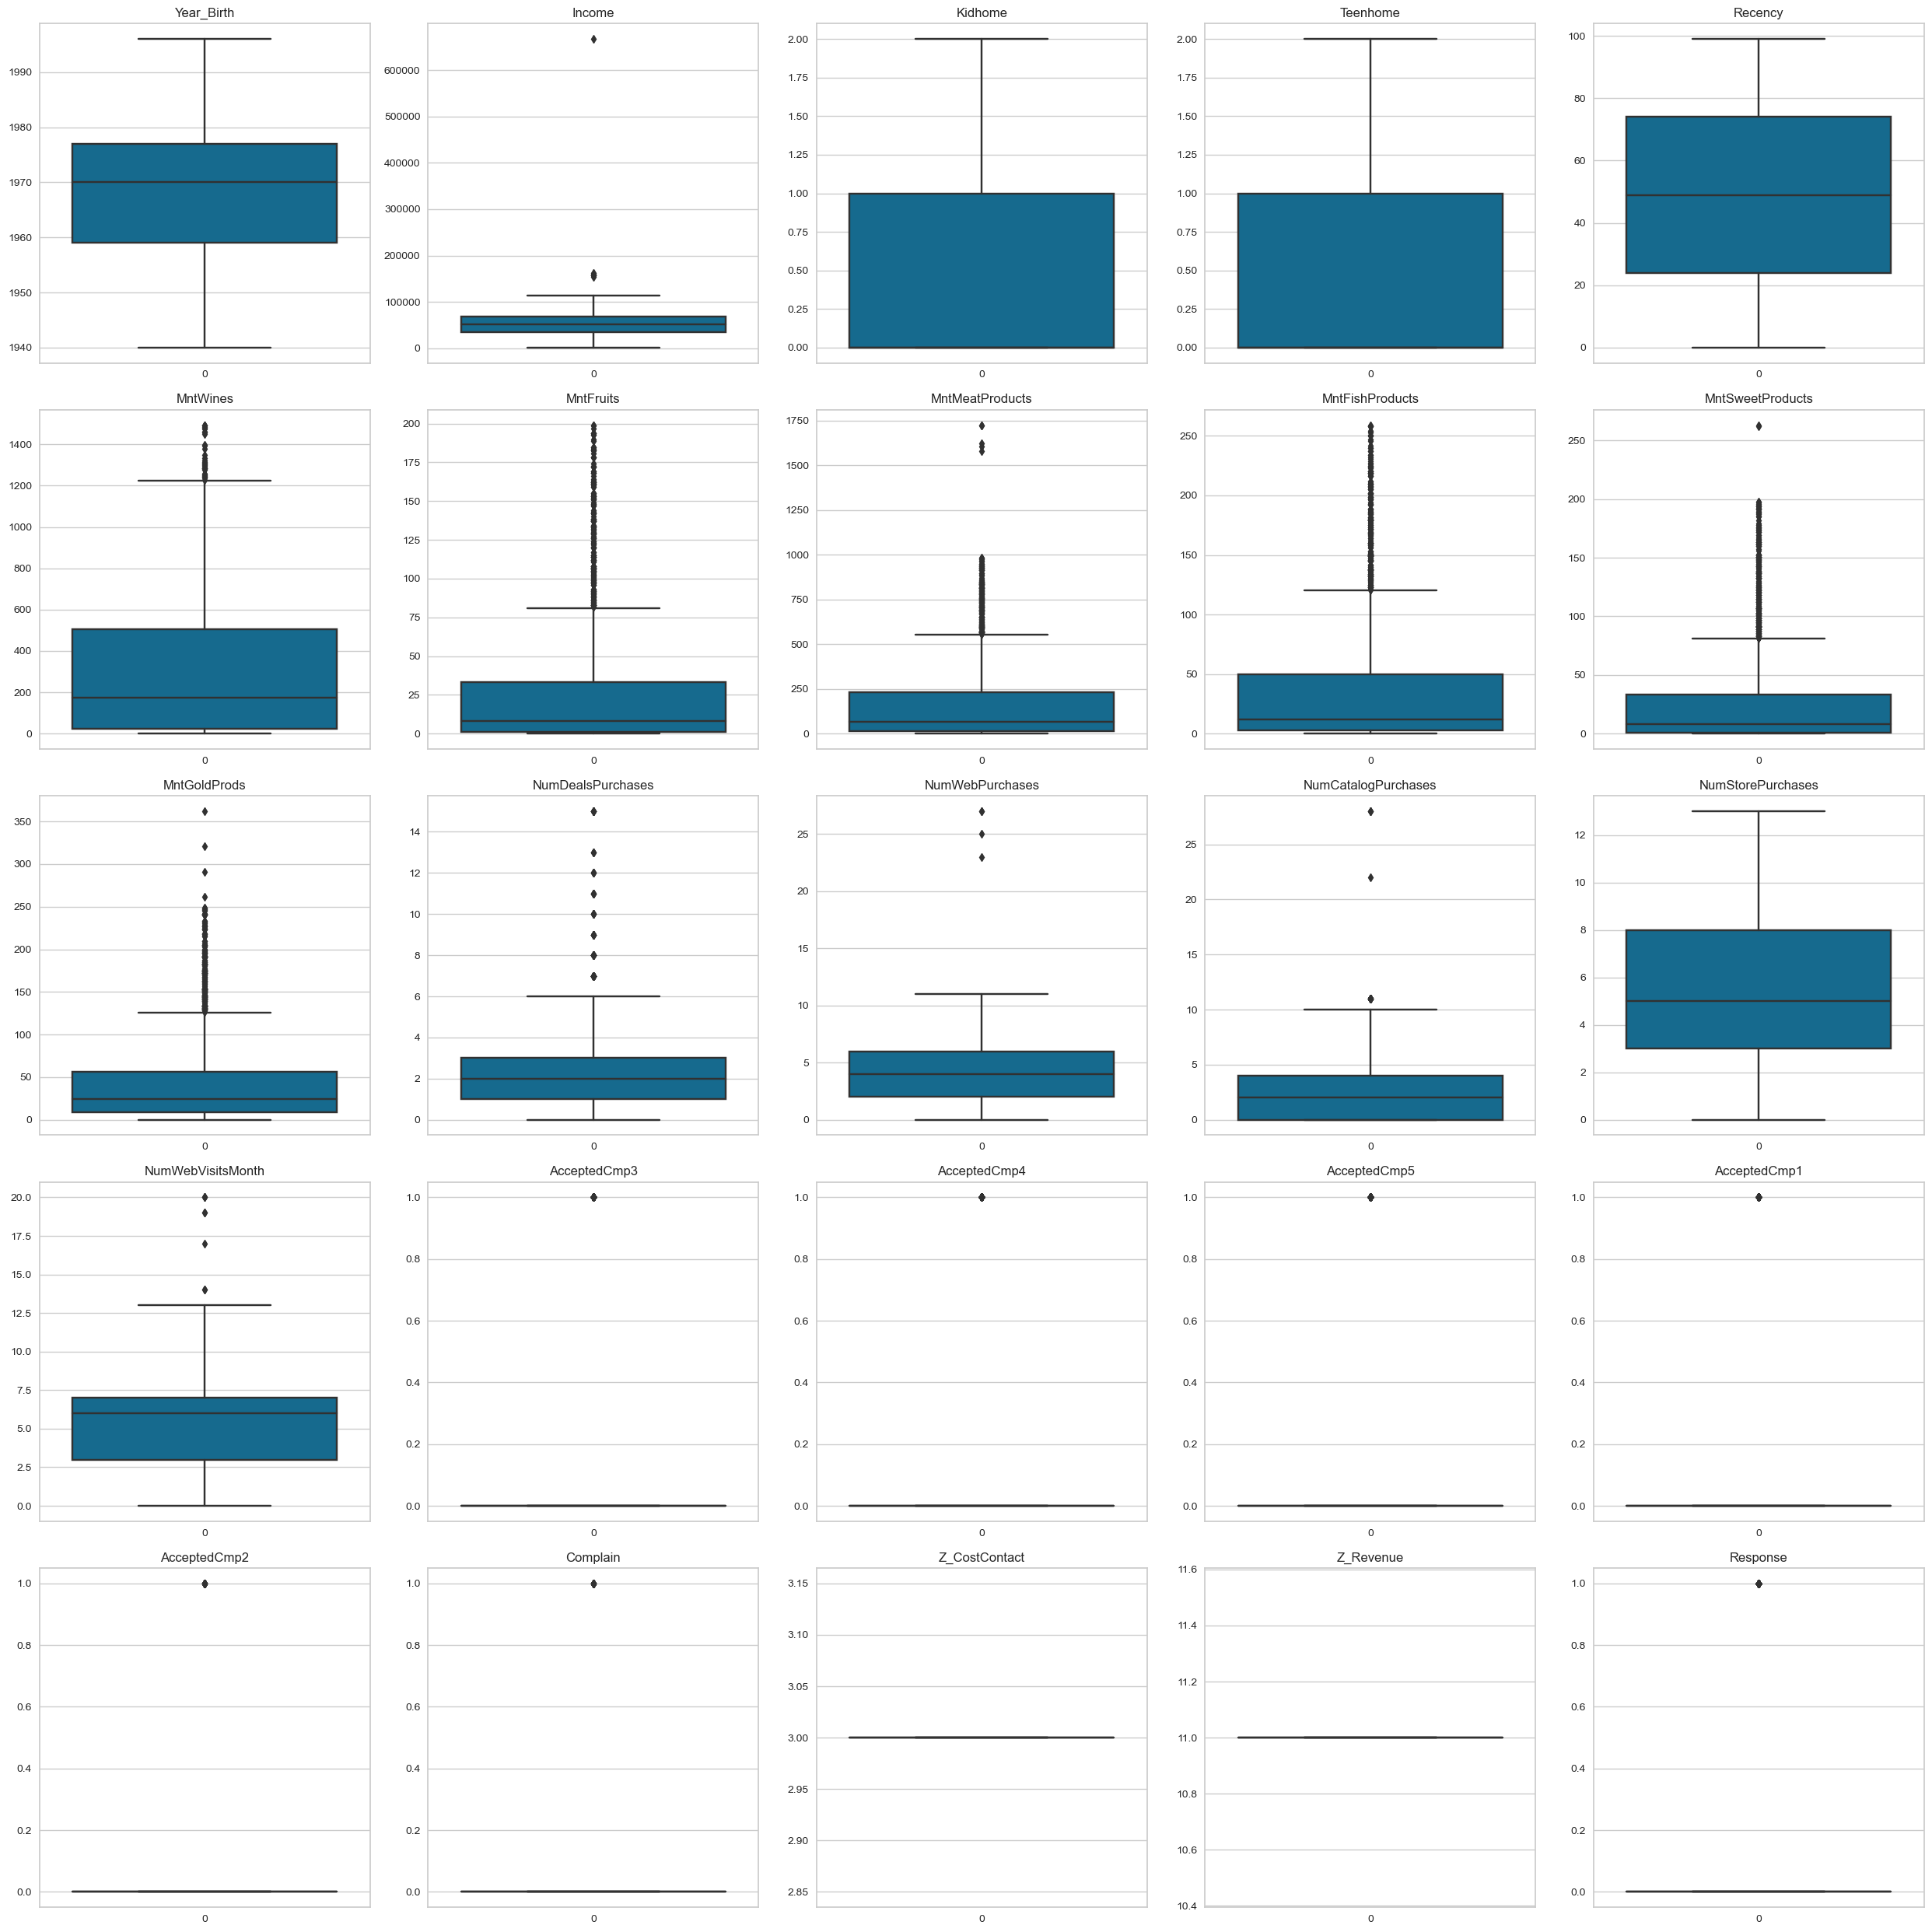

In [686]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = data2.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])

num_cols = len(numerical_columns.columns)
num_rows = (num_cols + 4) // 5

plt.figure(figsize=(25, 5 * num_rows))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)
    sns.boxplot(data=numerical_columns[column])
    plt.title(column)
plt.tight_layout()
plt.show()

## Collinearity check

### Correlation Matrix

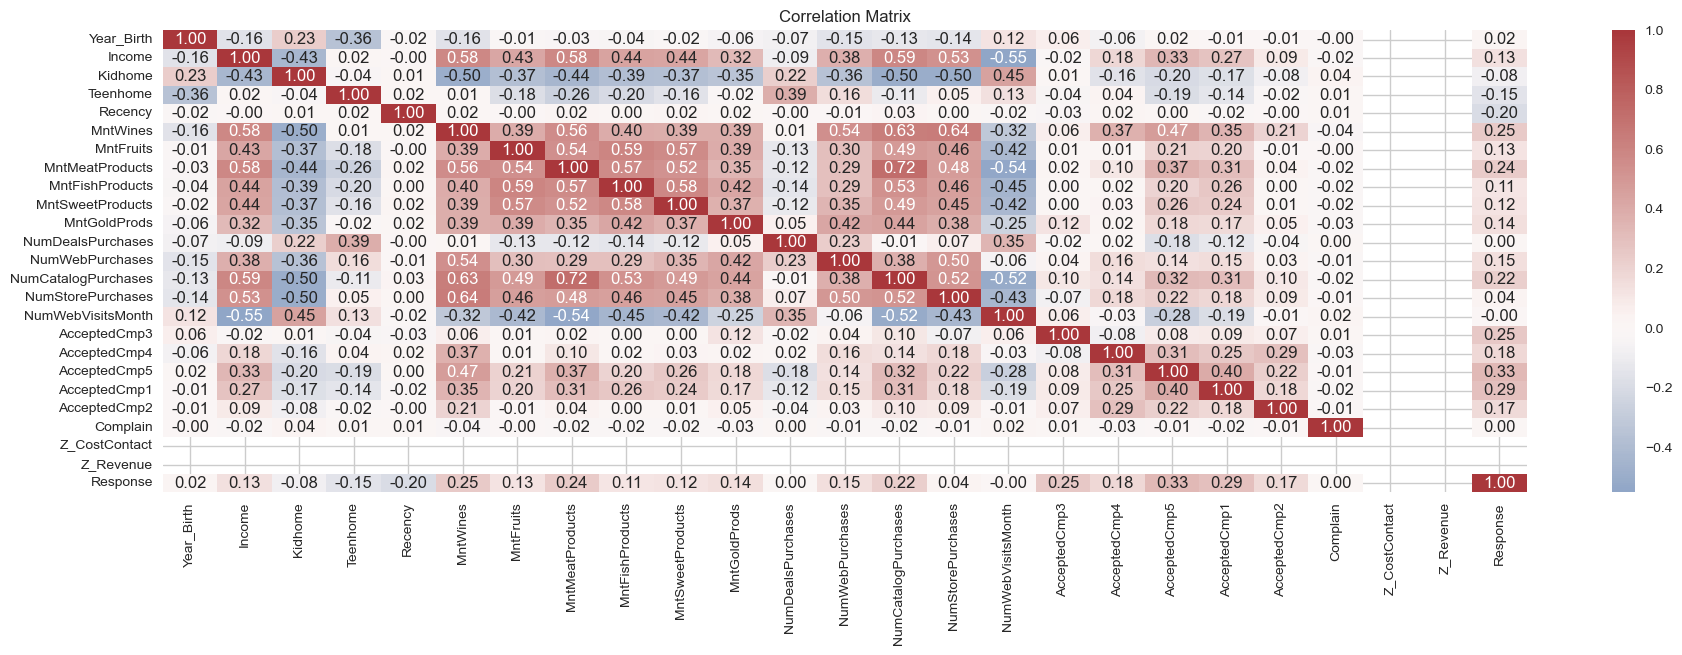

No high correlation.


In [687]:
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(22, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation Matrix')
plt.show()

# Setting a threshold of 80% as high correlation
high_correlation = corr_matrix[((corr_matrix <= -0.8) & (corr_matrix != -1)) | ((corr_matrix >= 0.8) & (corr_matrix != 1))]
if high_correlation.isnull().all().all():
    print("No high correlation.")
else:
    print("Correlation Matrix for values <= -0.8 or >= 0.8 (excluding self-compare):")
    print(high_correlation)

### VIF

In [688]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_features = add_constant(numerical_columns)

VIF = pd.Series([variance_inflation_factor(VIF_features.values, i) for i in range(VIF_features.shape[1])], index=VIF_features.columns)
print(VIF) # Usually VIF >= 5 suggest multicollinearity, but we dont have any.

Year_Birth             1.252157
Income                 2.188209
Kidhome                1.879214
Teenhome               1.625299
Recency                1.060332
MntWines               3.355995
MntFruits              1.946456
MntMeatProducts        2.943676
MntFishProducts        2.115822
MntSweetProducts       1.915586
MntGoldProds           1.513856
NumDealsPurchases      1.679466
NumWebPurchases        1.944617
NumCatalogPurchases    3.059666
NumStorePurchases      2.428667
NumWebVisitsMonth      2.334850
AcceptedCmp3           1.157140
AcceptedCmp4           1.371519
AcceptedCmp5           1.659242
AcceptedCmp1           1.355898
AcceptedCmp2           1.158709
Complain               1.004921
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               1.397355
dtype: float64


/Users/kellyliu/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


**As a result, we discover no multicollinearity from the numerical dataset.**

## Feature Engineering

### Adding new features(optional)

In [689]:
data_newfeature = data2.copy()

# Membership enrollment time !! SHOULD WE USE A DATE INSTEAD?
data_newfeature['Enroll_Year'] = data_newfeature['Dt_Customer'].str[-4:].astype(int)
data_newfeature['Enroll_Month'] = data_newfeature['Dt_Customer'].str[3:5].astype(int)
data_newfeature['Enroll_Day'] = data_newfeature['Dt_Customer'].str[0:2].astype(int)
data_newfeature.drop(columns=['Dt_Customer'], inplace=True)
data_newfeature['Member_Year'] = 2016 - data_newfeature['Enroll_Year']

# Since max enroll_year is 2014, we assume the company is evaluating their customer in 2016
data_newfeature['Age'] = 2016 - data_newfeature['Year_Birth']     

# Add total purchase
data_newfeature['Total_purchase'] = data_newfeature[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                           'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate features regarding the user
data_newfeature['Total_Children'] = data_newfeature['Kidhome'] + data_newfeature['Teenhome']
data_newfeature["Is_Parent"] = np.where(data_newfeature['Total_Children']> 0, 1, 0)

data_newfeature["Family_Size"] = data_newfeature["Marital_Status"].replace({"Married": 2, "Together": 2, \
                            "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1}).astype(int) \
                            + data_newfeature["Total_Children"]


data_newfeature['Cmp_Attitude'] = np.where((data_newfeature['AcceptedCmp1'] + data_newfeature['AcceptedCmp2'] +
                                            data_newfeature['AcceptedCmp3'] + data_newfeature['AcceptedCmp4'] +
                                            data_newfeature['AcceptedCmp5']) > 0, 1, 0)

In [690]:
data_newfeature.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Enroll_Year,Enroll_Month,Enroll_Day,Member_Year,Age,Total_purchase,Total_Children,Is_Parent,Family_Size,Cmp_Attitude
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,9,4,4,59,1617,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,3,8,2,62,27,2,1,3,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21,3,51,776,0,0,2,0


In [691]:
data_newfeature.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Enroll_Year,Enroll_Month,Enroll_Day,Member_Year,Age,Total_purchase,Total_Children,Is_Parent,Family_Size,Cmp_Attitude
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.0,2237.0,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,52196.540023,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.072865,0.074654,0.072418,0.064372,0.013411,0.008941,3.0,11.0,0.149307,2013.027716,6.465802,15.628520,2.972284,47.098346,605.743406,0.950827,0.715244,2.595887,0.206527
std,3245.118591,11.701917,25078.616054,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.259974,0.262890,0.259237,0.245469,0.115052,0.094152,0.0,0.0,0.356471,0.684704,3.488073,8.791063,0.684704,11.701917,601.840466,0.752037,0.451399,0.907305,0.404903
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,1.000000,1.000000,2.000000,20.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,2829.000000,1959.000000,35416.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,3.000000,8.000000,3.000000,39.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,5455.000000,1970.000000,51369.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,6.000000,16.000000,3.000000,46.000000,396.000000,1.000000,1.000000,3.000000,0.000000
75%,8427.000000,1977.000000,68281.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,10.000000,23.000000,3.000000,57.000000,1045.000000,1.000000,1.000000,3.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,12.000000,31.000000,4.000000,76.000000,2525.000000,3.000000,1.000000,5.000000,1.000000


In [692]:
data_newfeature.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Enroll_Year,Enroll_Month,Enroll_Day,Member_Year,Age,Total_purchase,Total_Children,Is_Parent,Family_Size,Cmp_Attitude
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.0,2237.0,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,5590.726419,1968.901654,52196.540023,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.072865,0.074654,0.072418,0.064372,0.013411,0.008941,3.0,11.0,0.149307,2013.027716,6.465802,15.628520,2.972284,47.098346,605.743406,0.950827,0.715244,2.595887,0.206527
std,3245.118591,11.701917,25078.616054,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.259974,0.262890,0.259237,0.245469,0.115052,0.094152,0.0,0.0,0.356471,0.684704,3.488073,8.791063,0.684704,11.701917,601.840466,0.752037,0.451399,0.907305,0.404903
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,1.000000,1.000000,2.000000,20.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,2829.000000,1959.000000,35416.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,3.000000,8.000000,3.000000,39.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,5455.000000,1970.000000,51369.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,6.000000,16.000000,3.000000,46.000000,396.000000,1.000000,1.000000,3.000000,0.000000
75%,8427.000000,1977.000000,68281.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,10.000000,23.000000,3.000000,57.000000,1045.000000,1.000000,1.000000,3.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,12.000000,31.000000,4.000000,76.000000,2525.000000,3.000000,1.000000,5.000000,1.000000


/Users/kellyliu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


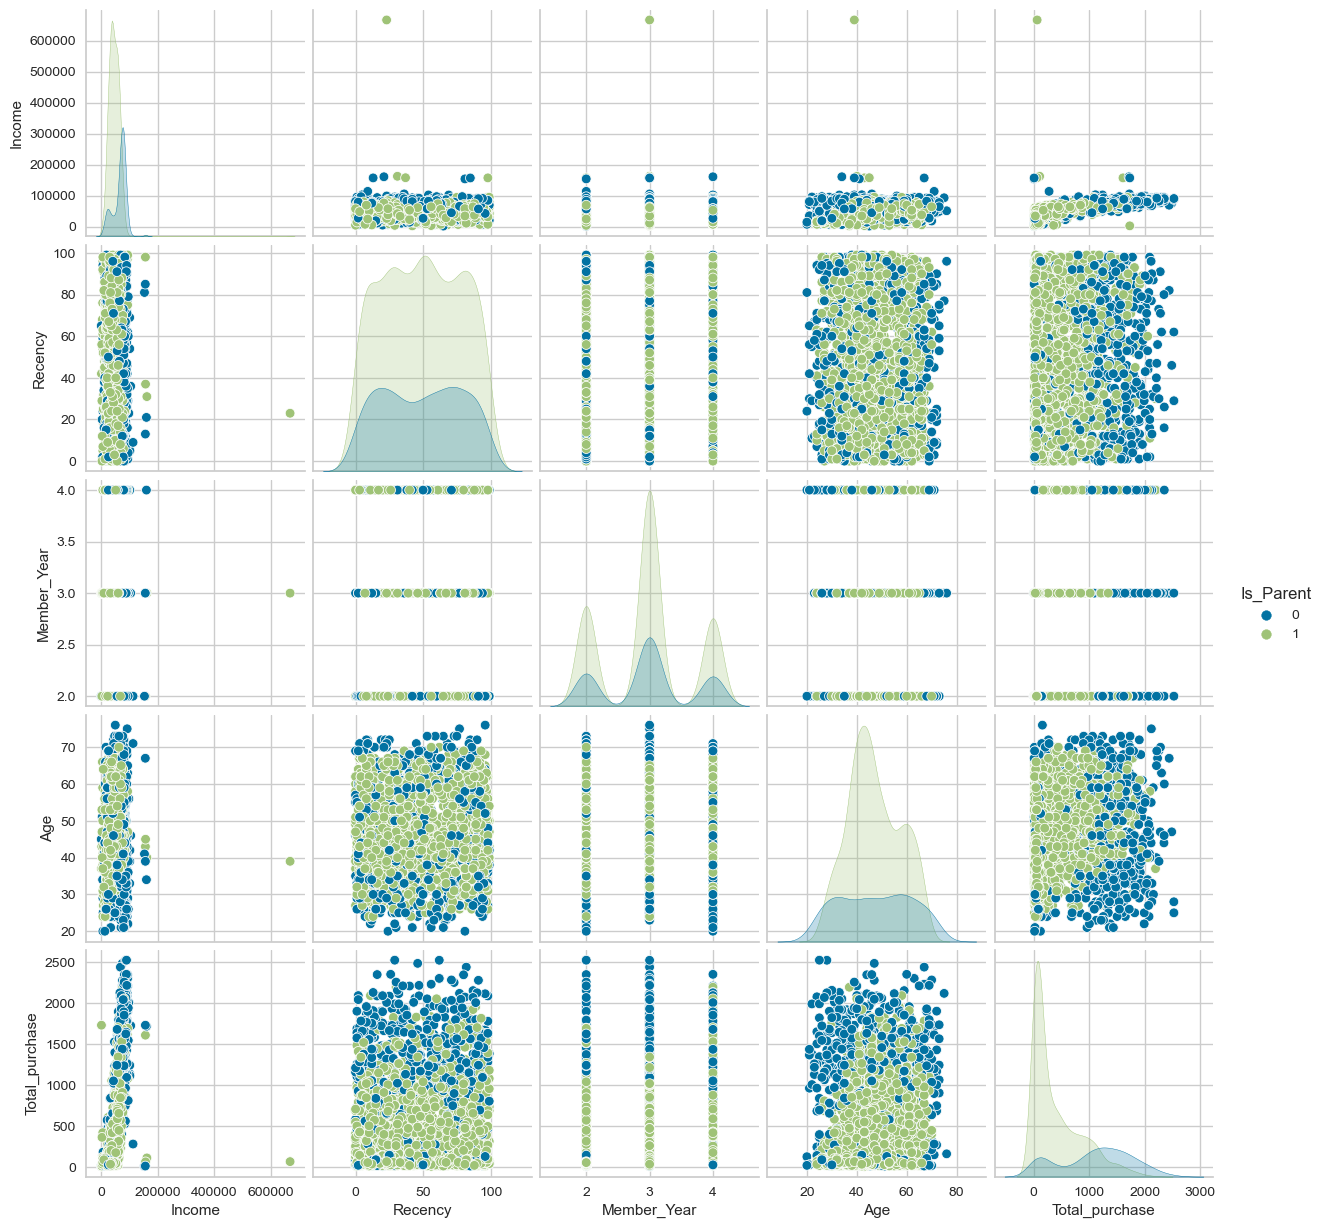

In [693]:
sns.pairplot(data_newfeature[["Income", "Recency", "Member_Year", "Age", "Total_purchase", "Is_Parent"]], hue="Is_Parent")
plt.show()

#### Dropping outliers

In [694]:
data_newfeature = data_newfeature[ (data_newfeature["Income"] < 600000)]

/Users/kellyliu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


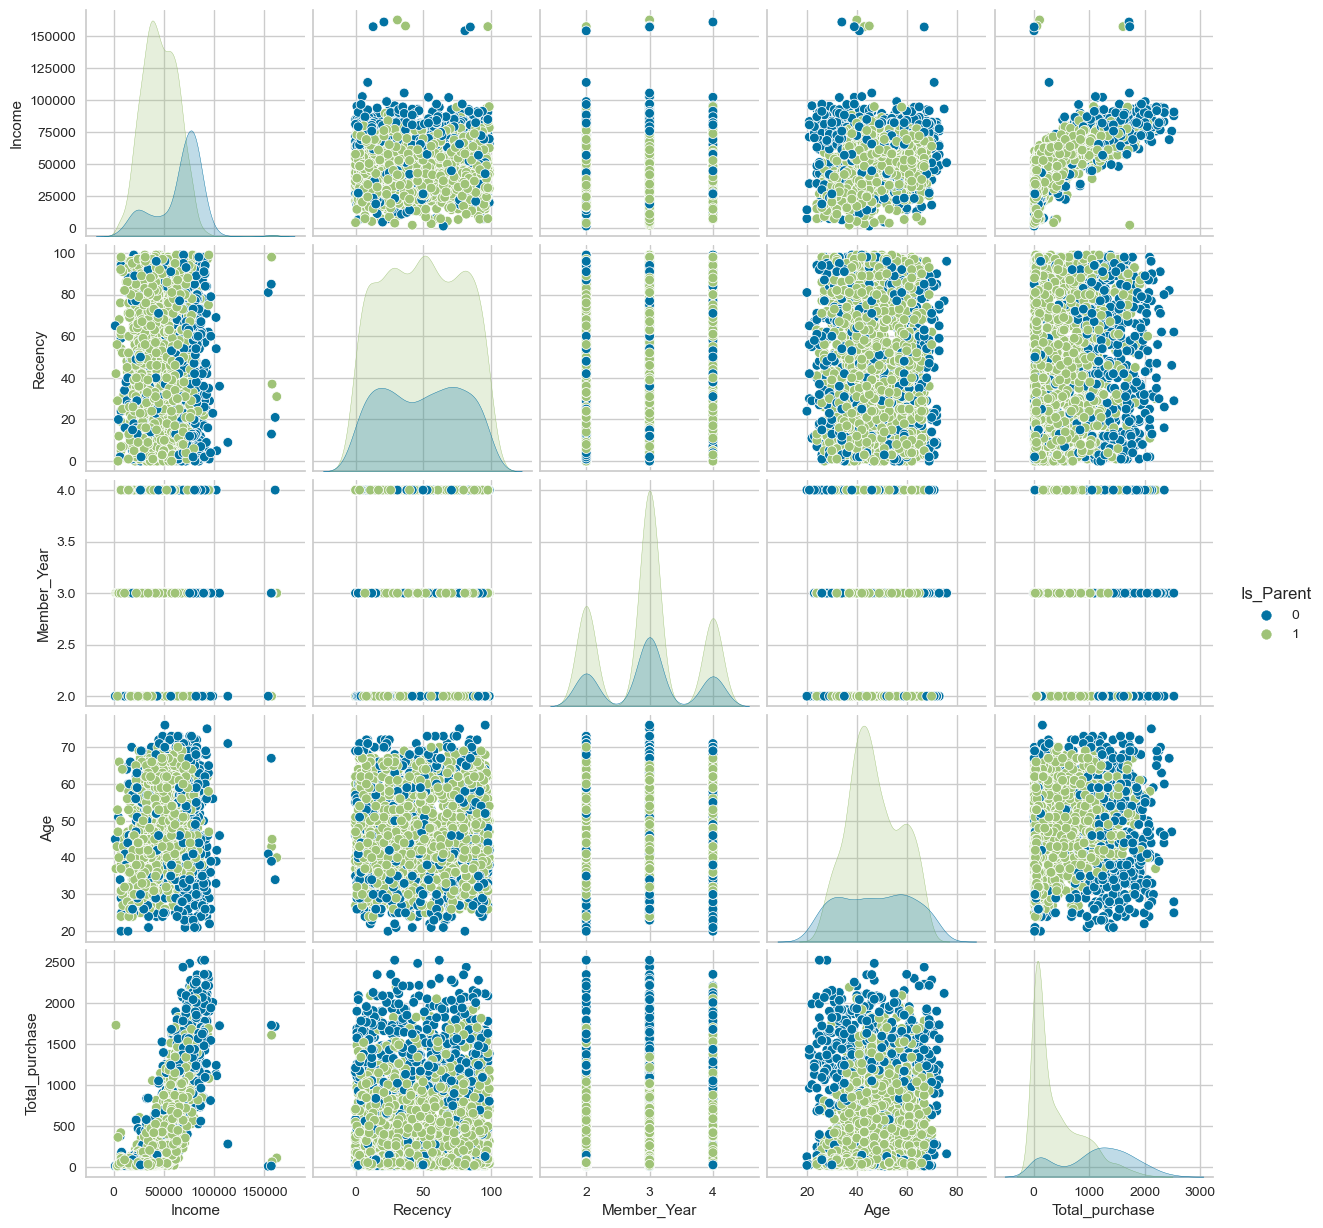

In [695]:
sns.pairplot(data_newfeature[["Income", "Recency", "Member_Year", "Age", "Total_purchase", "Is_Parent"]], hue="Is_Parent")
plt.show()

### One-Hot encoding

In [696]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = encoder.fit_transform(data_newfeature[['Education', 'Marital_Status']])

encoded_feature_names = encoder.get_feature_names_out(['Education', 'Marital_Status'])

encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

data_newfeature = pd.concat([data_newfeature.drop(columns=['Education', 'Marital_Status']), encoded_df], axis=1)


In [697]:
data_newfeature.head(3)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Enroll_Year,Enroll_Month,Enroll_Day,Member_Year,Age,Total_purchase,Total_Children,Is_Parent,Family_Size,Cmp_Attitude,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524.0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,2012.0,9.0,4.0,4.0,59.0,1617.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174.0,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014.0,3.0,8.0,2.0,62.0,27.0,2.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141.0,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013.0,8.0,21.0,3.0,51.0,776.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Collinearity check (again)

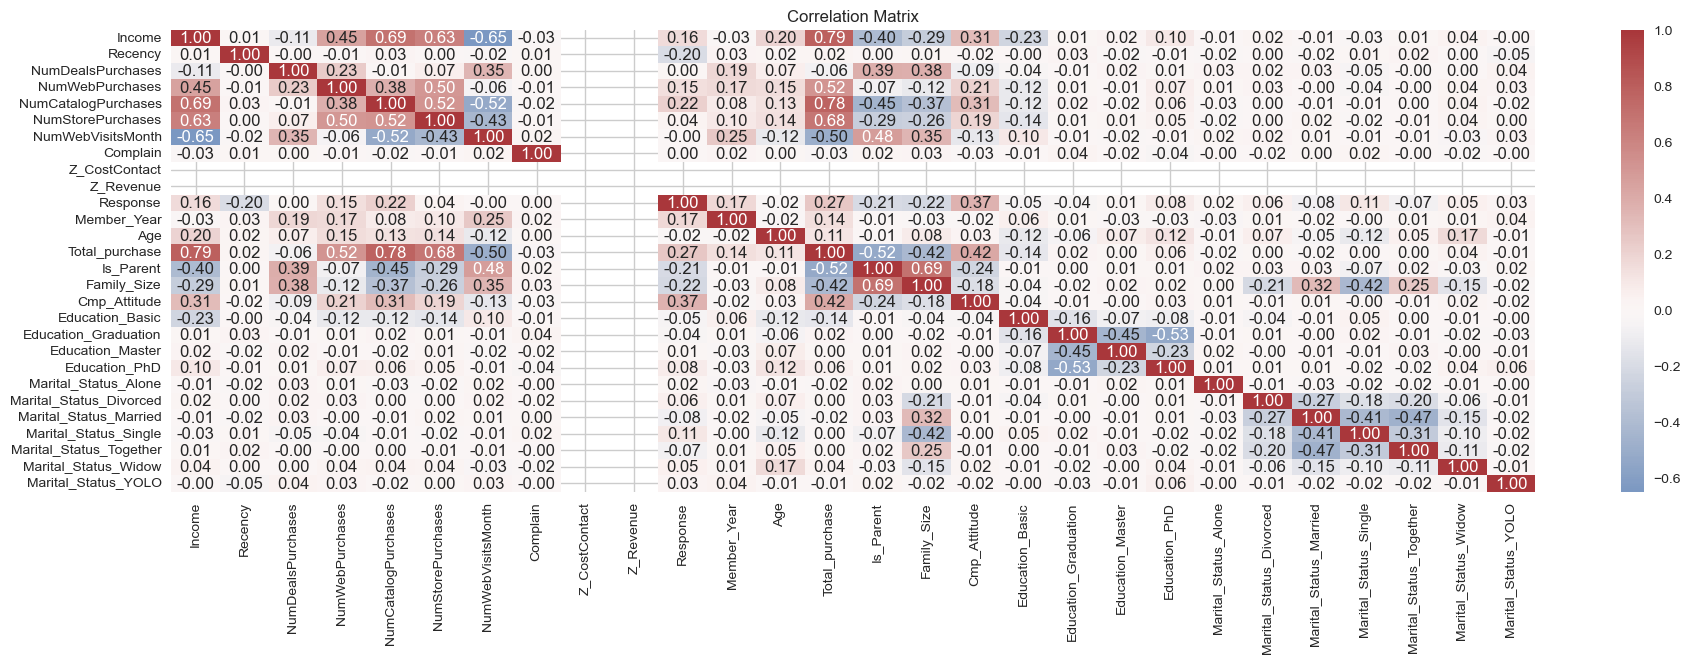

No high correlation.


In [698]:
# Exluding column 
exclude = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', \
           'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', \
          'Enroll_Year', 'Enroll_Month', 'Enroll_Day', 'Total_Children']
data3 = data_newfeature.loc[:, ~data_newfeature.columns.isin(exclude)] 
corr_matrix2 = data3.corr()
plt.figure(figsize=(22, 6))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation Matrix')
plt.show()

# Setting a threshold of 80% as high correlation
high_correlation2 = corr_matrix2[((corr_matrix2 <= -0.8) & (corr_matrix2 != -1)) | ((corr_matrix2 >= 0.8) & (corr_matrix2 != 1))]
if high_correlation2.isnull().all().all():
    print("No high correlation.")
else:
    print("Correlation Matrix for values <= -0.8 or >= 0.8 (excluding self-compare):")
    print(high_correlation2)

In [699]:
data3.isna().sum() # No missing values

Income                     1
Recency                    1
NumDealsPurchases          1
NumWebPurchases            1
NumCatalogPurchases        1
NumStorePurchases          1
NumWebVisitsMonth          1
Complain                   1
Z_CostContact              1
Z_Revenue                  1
Response                   1
Member_Year                1
Age                        1
Total_purchase             1
Is_Parent                  1
Family_Size                1
Cmp_Attitude               1
Education_Basic            1
Education_Graduation       1
Education_Master           1
Education_PhD              1
Marital_Status_Alone       1
Marital_Status_Divorced    1
Marital_Status_Married     1
Marital_Status_Single      1
Marital_Status_Together    1
Marital_Status_Widow       1
Marital_Status_YOLO        1
dtype: int64

In [700]:
data3.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Member_Year,Age,Total_purchase,Is_Parent,Family_Size,Cmp_Attitude,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.0,2236.0,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,51921.732573,49.116279,2.326029,4.087657,2.663238,5.795617,5.318873,0.008945,3.0,11.0,0.149374,2.972272,47.101968,605.986583,0.715116,2.595707,0.206619,0.02415,0.503578,0.165474,0.216905,0.001342,0.103309,0.386404,0.214222,0.258497,0.034436,0.000894
std,21452.423990,28.957284,1.933032,2.779988,2.923898,3.251129,2.426886,0.094173,0.0,0.0,0.356536,0.684857,11.703281,601.865156,0.451460,0.907468,0.404970,0.15355,0.500099,0.371691,0.412230,0.036613,0.304431,0.487034,0.410373,0.437907,0.182388,0.029901
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.000000,20.000000,5.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35409.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.0,11.0,0.000000,3.000000,39.000000,69.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51342.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,3.0,11.0,0.000000,3.000000,46.000000,396.500000,1.000000,3.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68275.750000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,3.0,11.0,0.000000,3.000000,57.000000,1045.500000,1.000000,3.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,162397.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.0,11.0,1.000000,4.000000,76.000000,2525.000000,1.000000,5.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [701]:
data3.dropna(inplace=True)

/var/folders/tr/psvn_y8x0w34ssccnb237zq00000gn/T/ipykernel_82356/3651136420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.dropna(inplace=True)


In [702]:
data3.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Member_Year,Age,Total_purchase,Is_Parent,Family_Size,Cmp_Attitude,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.0,2235.0,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.00000,2235.000000,2235.000000,2235.000000,2235.000000
mean,51921.308739,49.120358,2.325727,4.088143,2.663982,5.796421,5.318121,0.008949,3.0,11.0,0.148993,2.971812,47.095302,606.180761,0.714989,2.595078,0.206711,0.024161,0.503356,0.165548,0.217002,0.001342,0.103356,0.38613,0.214318,0.258613,0.034452,0.000895
std,21457.215437,28.963122,1.933411,2.780514,2.924341,3.251635,2.427168,0.094194,0.0,0.0,0.356162,0.684665,11.701653,601.929788,0.451521,0.907185,0.405037,0.153583,0.500101,0.371758,0.412296,0.036621,0.304491,0.48697,0.410440,0.437970,0.182428,0.029907
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2.000000,20.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,35402.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.0,11.0,0.000000,3.000000,39.000000,69.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,51315.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,3.0,11.0,0.000000,3.000000,46.000000,397.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,68277.500000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,3.0,11.0,0.000000,3.000000,57.000000,1046.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000
max,162397.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.0,11.0,1.000000,4.000000,76.000000,2525.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [703]:
VIF_features2 = add_constant(data3)

VIF2 = pd.Series([variance_inflation_factor(VIF_features2.values, i) for i in range(VIF_features2.shape[1])], \
                 index=VIF_features2.columns)
print(VIF2) # Only the one hot encoded dummies are high, this is not concerning

/Users/kellyliu/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Income                       4.191243
Recency                      1.064712
NumDealsPurchases            1.660638
NumWebPurchases              1.831002
NumCatalogPurchases          2.946385
NumStorePurchases            2.294600
NumWebVisitsMonth            2.676156
Complain                     1.007675
Z_CostContact                0.000000
Z_Revenue                    0.000000
Response                     1.395807
Member_Year                  1.273812
Age                          1.186410
Total_purchase               5.629104
Is_Parent                    3.300738
Family_Size                  5.014522
Cmp_Attitude                 1.397290
Education_Basic              1.304854
Education_Graduation         3.332409
Education_Master             2.436883
Education_PhD                2.801806
Marital_Status_Alone         2.513697
Marital_Status_Divorced    105.247375
Marital_Status_Married     268.903210
Marital_Status_Single      190.163940
Marital_Status_Together    217.764611
Marital_Stat

## PCA Dimention Reduction

In [704]:
data_newfeature.dropna(inplace=True)

In [705]:
# PCA for dimensionality reduction
pca = PCA(n_components=3)
pca_ds = pd.DataFrame(pca.fit_transform(data_newfeature), columns=["col1", "col2", "col3"])

## Select cluster number

/Users/kellyliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kellyliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kellyliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kellyliu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

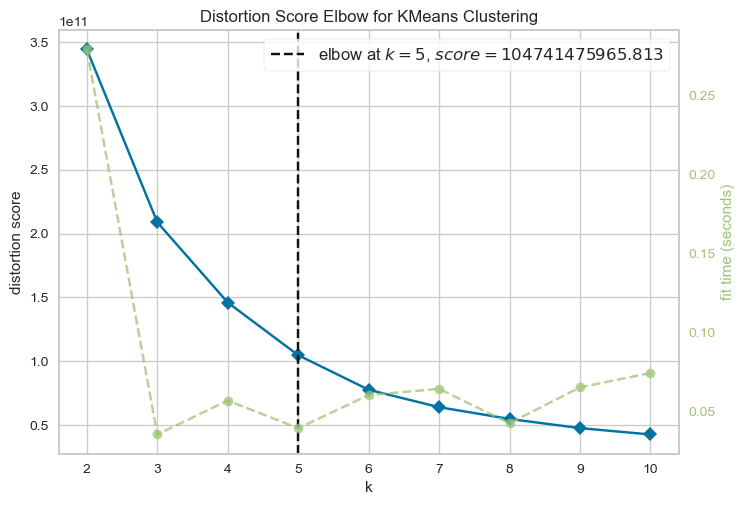

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [706]:
# Clustering with KMeans and visualizing clusters
elbow_m = KElbowVisualizer(KMeans(), k=10)
elbow_m.fit(pca_ds)
elbow_m.show()

## Plot Clusters

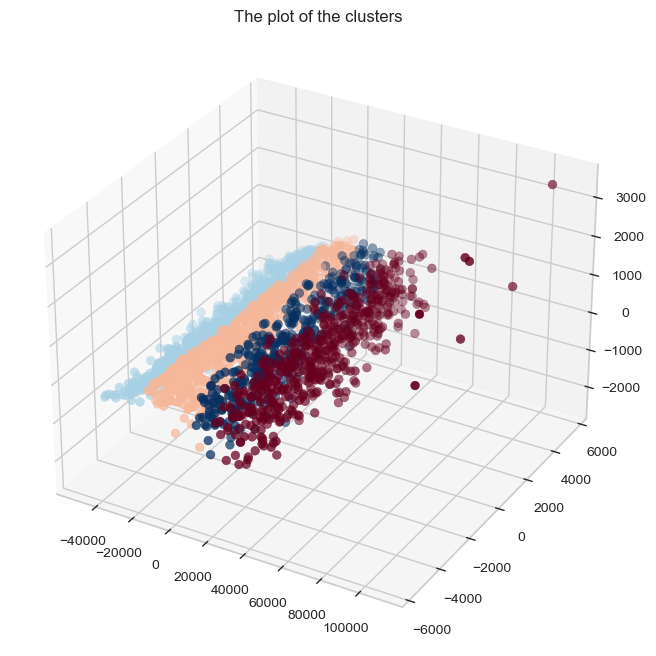

In [707]:
# Initiating the Agglomerative Clustering model
ac = AgglomerativeClustering(n_clusters=4)
yhat_ac = ac.fit_predict(pca_ds)
pca_ds["Clusters"] = yhat_ac
data_newfeature["Clusters"] = yhat_ac

# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d')
ax.scatter(pca_ds["col1"], pca_ds["col2"], pca_ds["col3"], s=40, c=pca_ds["Clusters"], cmap='RdBu')
ax.set_title("The plot of the clusters")
plt.show()

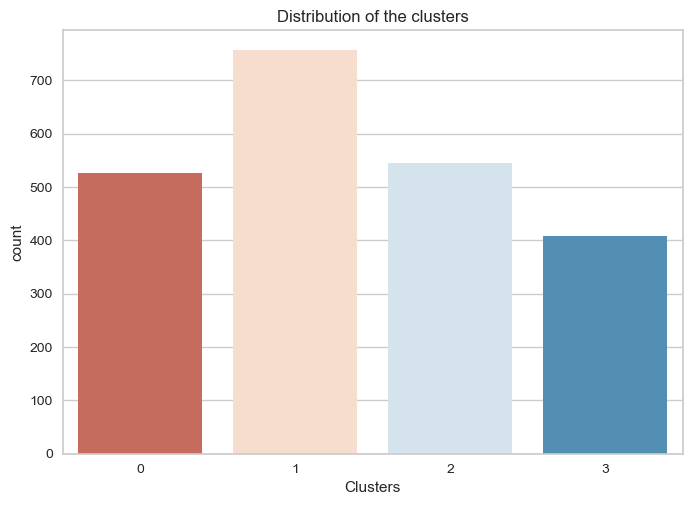

In [708]:
# Distribution of the clusters
sns.countplot(x="Clusters", data=data_newfeature, palette="RdBu")
plt.title("Distribution of the clusters")
plt.show()

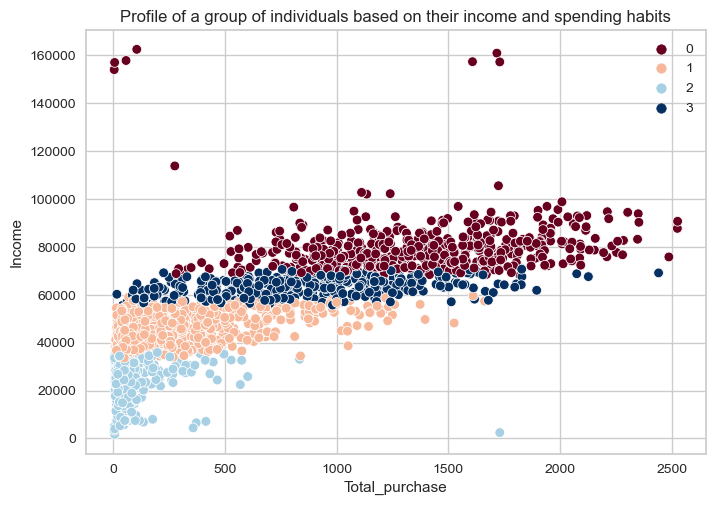

In [709]:
# Profile of a group of individuals based on their income and spending habits
sns.scatterplot(data=data_newfeature, x="Total_purchase", y="Income", hue="Clusters", palette="RdBu")
plt.title("Profile of a group of individuals based on their income and spending habits")
plt.legend()
plt.show()

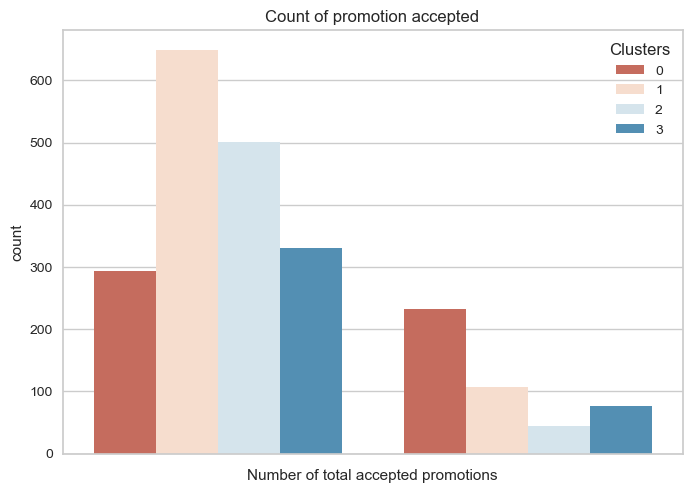

In [710]:
# Plotting count of total campaign accepted
plt.figure()
fig = sns.countplot(data=data_newfeature, x="Cmp_Attitude", hue="Clusters", palette="RdBu")
fig.set_title("Count of promotion accepted")
fig.set_xlabel("Number of total accepted promotions")
fig.set_xticklabels([])  # Hide x-axis labels
plt.show()

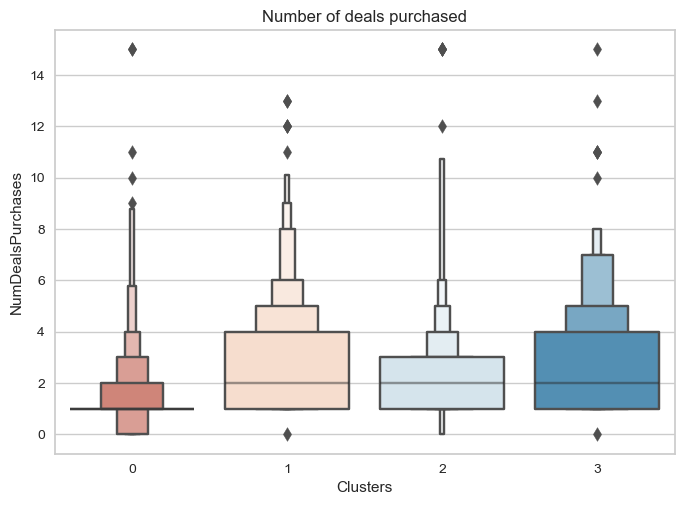

In [711]:
# Plotting the number of deals purchased
plt.figure()
pl = sns.boxenplot(data=data_newfeature, x="Clusters", y="NumDealsPurchases", palette="RdBu")
pl.set_title("Number of deals purchased")
plt.show()

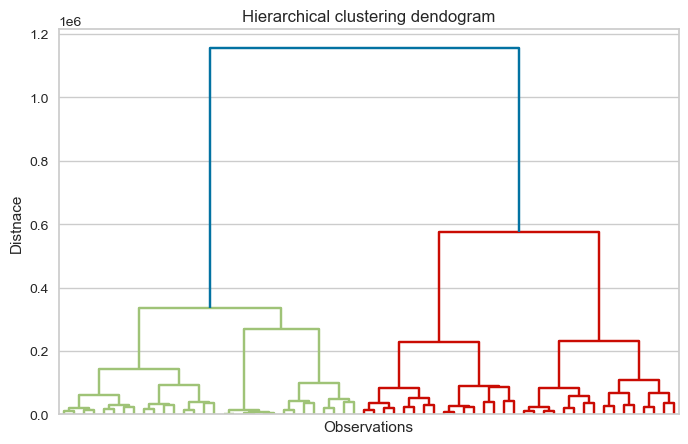

In [712]:
# Create a hierarchical clustering dendrogram
hier_clust = linkage(data_newfeature, method = 'ward')
plt.figure(figsize = (8, 5))
plt.title('Hierarchical clustering dendogram')
plt.xlabel('Observations')
plt.ylabel('Distnace')
dendrogram(hier_clust,
           truncate_mode='level',
           p=5,
           show_leaf_counts=False,
           no_labels=True)
plt.show()